In [3]:
import math
import random
import platform
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 들여오는 library
"""
시스템에 따라 기본 한글 폰트를 읽어 들인다.
"""
pattern = re.compile("Linux|Ubuntu")
    
# 폰트를 적재한다.
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif pattern.search(platform.platform()):
#elif 'Ubuntu' in platform.platform() or 'Linux' in platform.platform():
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif 'SuSE' in platform.platform():
    path = "/usr/share/fonts/truetype/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

%matplotlib inline

파이썬: 다시 배우는 핵심 고등 수학

# 7.1 통계란?

수학 시험 평균이 70점이다. 내가 75점이라면 상위권?

## 7.1.1 모집단과 표본

20대 한국인 남성의 평균 신장을 구하려면 어떻게 해야 하나? 2018/12월 20대 한국인 남성 인구는 359만명 - 모든 사람의 키를 조사하기는 불가능하다.

그래서 일반적으로 이중 일부만을 선택해서 키를 재고 그 값을 토대로 구한 평균 값을 20대 한국인 남성의 평균 신장으로 사용한다.

통계학에서 조사하려고 하는 집단 전체를 **모집단** 이라고 부른다. 집단이 너무 커서 전체를 조사할 수 없을 때 그 중에서 일부를 무작위로 선택해서 이것을 가지고 모집단을 추측한다. 이렇게 무작위로 선택한 집단을 **표본**이라 한다. 표본에서 모집단을 추측하는 작업을 연구하는 영역을 **추측 통계학**이라고 한다. 그러나 큰 집단을 사용해서 뭔가를 조사할 때 모집단과 표본의 차이를 충분히 이해해야 한다.

## 7.1.2 데이터가 흩어진 정도 살펴보기

**도수분포표**, **히스토그램** 은 막대그래프로 데이터가 흩어진 상태를 볼 수 있다.
 - *분포*란 데이터가 흩어진 상태를 의미한다.


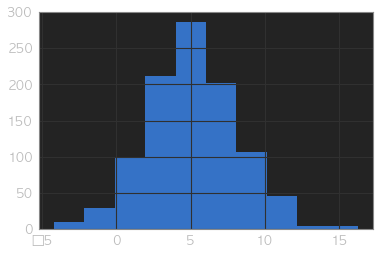

In [3]:
# np.random.normal()로 가우스 분포를 가지는 데이터 생성
#  - 중간값 5, 크기 3, 개수 1000



# Histogram은 hist()
# data의 시계열 데이터를 히스토그람으로 그리면 5을 중심으로하는 가우스분포 표현.
plt.figure()
plt.hist(data)
plt.show()

**분포곡선**은 데이터가 흩어진 모습을 곡선으로 함께 나타낸 것이다.

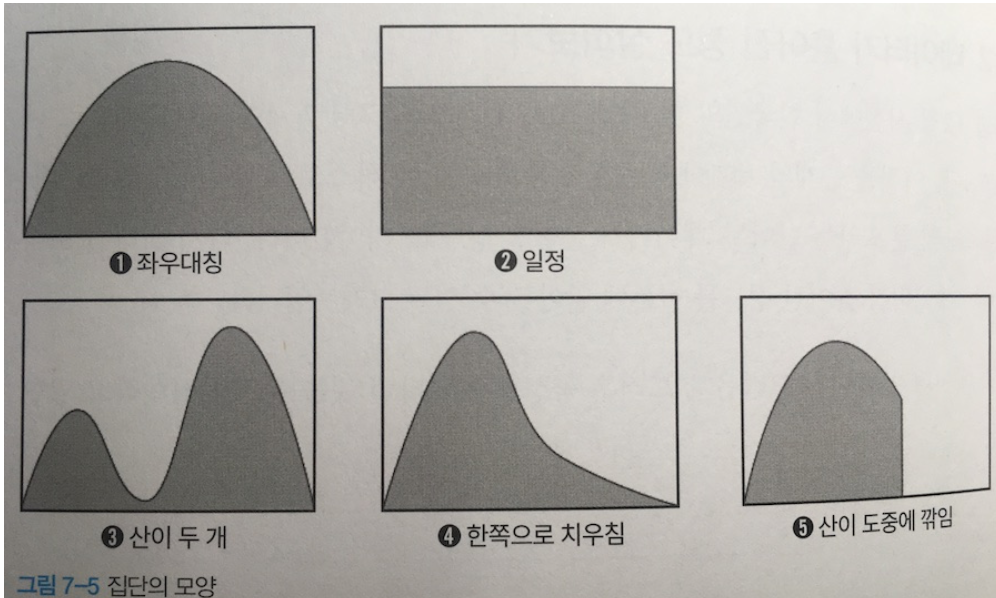

그림 같이 좌우대칭인 분포를 **정규분포**라고 한다. 정규분포에는 연령별 키, 몸무게, 벚꽃이 피는 날짜, 장마가 시작한 날짜, 공장에서 생산되는 삼각김밥 등 공산품의 길이나 무게 등등이 많이 있다.

위 2같은 일정한 분포를 **균등분포** - 주사위를 몇 백번 던졌을 때 숫자가 나오는 패턴은 이 균등분포가 있다.

3,4,5 같이 한쪽으로 치우치는 모습은 주의해야 한다.

## 7.1.3 평균값, 중앙값, 최빈값

어떤 집단의 경향을 볼 때 **대표값** 을 보는데 평균/중앙/최빈값을 자주 본다. 집단의 모양에 따라 대표값도 다르게 나타난다.

### 중심경향성

데이터의 중심이 어디인지를 나타내는 중심 경향성 (Central tendency) 지표는 매우 중요하다. 

대부분 데이터 값을 데이터 위치의 개수로 나눈 평균을 사용할 수 있다. 평균을 통해서 각 지표가 전체 지표중에서 어느 위치인지를 파악하기 좋다.
- 평균값
- 중앙값
- 최빈값


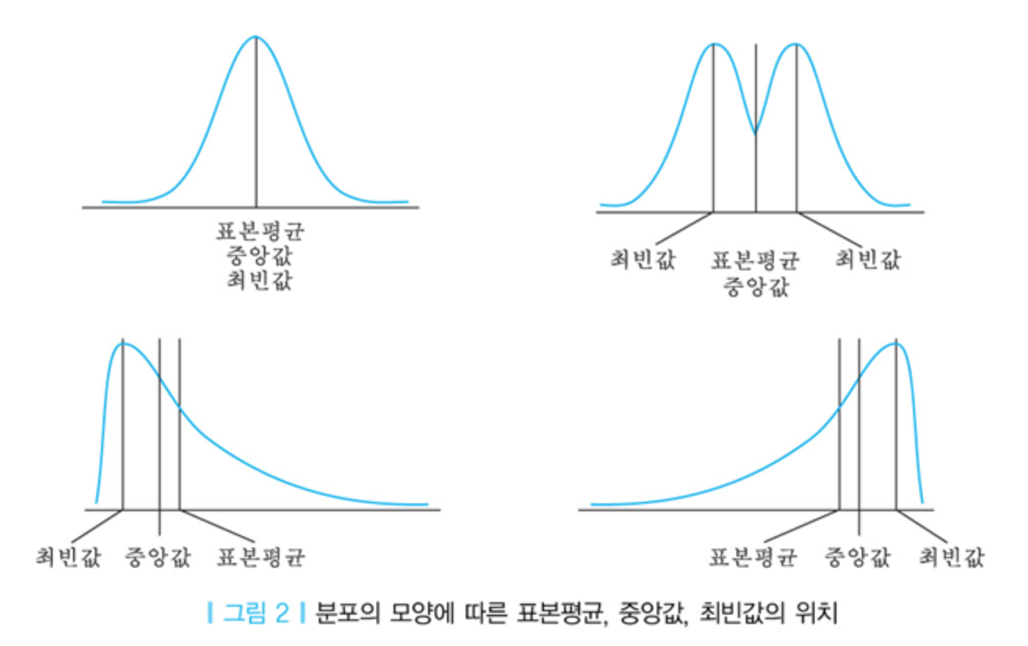

http://m.blog.daum.net/kjk1991/1650059?np_nil_b=-1![image.png]()

### 평균값

모든 데이터를 더해서 데이터의 개수르 나눈 값이 **평균값**이다.

데이터는 데이터의 개수, 값 출현 횟수로 규모를 파악할 수 있다. 아래는 어떤 곳의 년도별 기부금 데이터다

In [2]:
donations = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]

In [3]:
sum_donations = 0
for i in donations:
    sum_donations += i
sum_donations / len(donations)

477.75

In [4]:
# numpy.mean 이용



477.75

### 중앙값 median

중앙값(중위수, Median)은 정렬된 데이터에서 가장 가운데 위치한 값을 말한다. 데이터 개수가 홀수라면 가장 가운데 위치 값을 사용한다. 데이터 개수가 일 때 짝수라면 가장 중앙에 있는 두 데이터의 평균을 의미한다.



$$
\frac{N+1}{2} \longleftarrow 홀수 \\
\frac{\frac{N}{2}+(\frac{N}{2}+1)}{2} \longleftarrow 짝수
$$

집단의 모양이 정규분포나 균등분포일 때 평균값과 중앙값은 거의 같은 값이다.


In [5]:
def calc_median(numbers):
    """
    find the middle-most value of list
    """
    n = len(numbers)
    
    sorted_number = sorted(numbers)
    midpoint = n // 2
    if n % 2 == 1: # odd
        return sorted_number[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_number[lo] + sorted_number[hi]) / 2

In [6]:
calc_median(donations)

500.0

In [7]:
# np.median 이용



500.0

### 최빈값 mode

최빈값(mode)은 데이터에서 가장 빈번하게 출현하는 값이다. 그래서 공산품 같은 경우 최빈값을 이용해야 더 많은 사람들에 맞는 제품을 만들 수 있다.


예를 들어 한 반에 학생 20명의 수학시험 점수 - 만점 10이 있다. 여기서 빈번히 발생하는 점수는?

In [24]:
scores = [7, 8, 9, 2, 10, 9, 9, 9, 9, 4, 5, 6, 1, 5, 6, 7, 8, 6, 1, 10]
max(scores), min(scores)

(10, 1)

#### `np.bincount()` 메서드

np.bincount()로 발생하는 숫자의 빗도수를 얻어 최빈값을 파악할 수 있다. 

In [25]:
# np.bincount 이용



array([0, 2, 1, 0, 1, 2, 3, 2, 2, 5, 2])

#### `numpy.argmax()`

평균값, 중앙값, 최빈값

In [10]:
# 평균 np.mean())

# 중앙 np.median())

# 최빈값은 np.argmax( numpy.bincount() )

평균값: 6.55
중앙값: 7.0
최빈값: 9


---

# 7.2 데이터가 흩어진 정도 조사하기

NBA 공인구는 72인치(182.88cm) 높이에서 낙하했을 때 52-56인치(132.08~142.24cm) 높이로 튀어 올라야 한다고 한다. 경기장 바닥, 온도, 습도, 바람 등 여러 요인으로 튕겨 올라오는 높이가 일정하지 않다. 동일한 농구공도 시행할 때 조금씩 차이가 있다. 이를 편차라고 한다.


## 7.2.1 분산과 표준편차

앞에 공인구 예를 살펴보았듯 평균에서 개별 숫자가 어떻게 위치 하는지 개별 값에 대한 산포도를 알아야 할 필요가 있다 - 집단의 모양을 파악하기 위해서 사용하는 방법이 분산과 표준편차이다.

**분산 Veriance**는 개별 요소들이 평균과 얼마나 떨어저 있는지 알 수 있다. **편차 Deviation**은 개별 값과 평균의 차이이다.

아래는 A, B 두 데이터가 있다. 

```
A | 94 | 105 | 107 | 106 | 88
B | 117 | 84 | 95 | 72 | 132
```


In [9]:
scoreA = [94,105,107,106,88]
scoreB = [117,84,95,72,132]

print('A 평균 {0} \t B 평균 {1}'.format(np.mean(scoreA), np.mean(scoreB)))

A 평균 100.0 	 B 평균 100.0


이 데이터를 평균이 100인 데이터를 기준으로 살펴보면 B가 평균에서 멀어지는 정도가 큰 것을 알 수 있다.

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


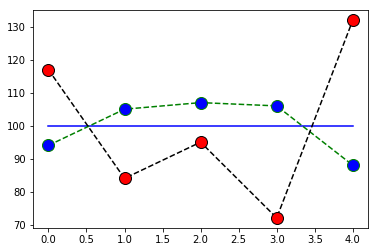

In [12]:
x = range(0,5)

plt.plot(x,[100]*5, color='blue') # 평균선
plt.plot(x, scoreA, color='green', linestyle='dashed', 
         marker='o', markerfacecolor='blue', markersize=12)
plt.plot(x,scoreB, color='black', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=12)

plt.show()

In [13]:
sum(scoreA)

500

#### 분산의 의미 이해해 보기

이렇게 멀어진 정도를 모두 더해보면 전체적인 정도를 알아 볼 수 있을 것이다. 그러나 평균과의 차를 모두 더하면 0이 된다.

In [16]:
# A 평균과 차 합 





A 평균과 차 합 0.0


이번에는 데이터 평균에 제곱해서 합계를 계산해 보면,

In [21]:
# A 평균과 차 제곱의 합, 분산






A 평균과 차 제곱의 합 290.0 	 분산 58.0


In [22]:
# B 평균과 차 제곱의 합, 분산






B 평균과 차 제곱의 합 2378.0 	 분산 475.6


분산은 평균 차의 제곱을 데이터 개수로 나누어 사용한다.

### 분산 Variance

이 값은 데이터 개수가 늘어나면 커지는데 데이터 개수에 영향을 받지 않도록 데이터 개수로 나누면 그 값이 **분산**이다.  분산은 차이의 제곱을 평균한 값이다. 분산 값이 높다는 것은 평균에서 멀리 떨어져 있다는 것이다. 낮은 분산 값은 평균에 가깝게 뭉쳐 있다는 것을 의미한다. 분산은 다음 공식을 이용해 계산한다.

$$ Variance = \frac{\sum (x_i - x_{mean})^2 }{n}
$$

각 항목과 평균의 차이를 합해서 제곱하고 항목 수로 나누면 분산이 된다.

### 편차 Deviation

여기서 데이터 평균을 제곱한 값을 사용했는데 본래 값으로 돌리기 위해 루트로 계산한 값이 **표준편차**이다. 표준편차는 분산의 제곱근을 구하면 된다. 

$$
Deviation = \sqrt{Variance}
$$

값이 평균의 표준편차 내에 있는 값은 일반적이지만 평균으로 부터 3개 이상의 표준편차의 값은 비정상 혹은 이상치Outlier 라고 한다.


In [20]:
# math.sqrt 이용해 A,B의 분산, 표준편차







print('A: 분산 {0} 표준편차 {1}'.format( varianceA, stdevA))
print('B: 분산 {0} 표준편차 {1}'.format( varianceB, stdevB))

A: 분산 58.0 표준편차 7.615773105863909
B: 분산 475.6 표준편차 21.808255317654368


### 분산과 표준편차

분산과 편차는 데이터가 흩어진 정도이다. 이 두 가지 값이 클수록 집단의 데이터가 흩어져 있음을 나타낸다. 특히 편차는 평균에서 *멀어진 정도*라고 이해하면 된다.

그런데 산포도에서 편차를 표준편차로 사용한다. 표준편차를 쓰는 이유는, **데이터의 단위에 관계없이 중심경향성은 같은 단위를 가져야** 한다. 산포도 범위range 또한 같은 단위이다. 하지만 분산의 단위는 제곱이다. 그렇기 때문에 분산 대신 원래 단위와 같은 단위를 가지는 표준편차 Standard Deviation을 이용할 때가 많다.


그런데 비교하려는 집단이 하나는 성적, 다른 하나는 날씨 온도면 데이터 기준의 단위가 달라진다. 분산/편차를 이용해도 의미있는 관계를 파악하기 어렵다.

> 예를 들어 달러로 모은 기부금들의 분산은 제곱 달러로 표시해야 하는데 표준편차는 달러를 그대로 사용할 수 있는 것이다.


위 결과를 도수분포표로 

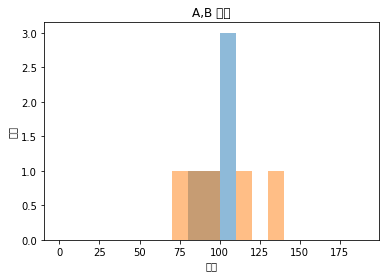

In [10]:
plt.title('A,B 빈도')
plt.xlabel('점수')
plt.ylabel('크기')
plt.hist(scoreA, bins=range(0, 200, 10), alpha=0.5, label='A')
plt.hist(scoreB, bins=range(0, 200, 10), alpha=0.5, label='B')
plt.show()

#### numpy.var(), numpy.std()

numpy 이용해 분산, 표준편차 구해보자.

In [32]:
print('---- A ----')


print('---- B ----')




---- A ----
평균: 100.0
분산:58.0
표준편차:7.615773105863909
---- B ----
평균: 100.0
분산:475.6
표준편차:21.808255317654368


## 7.2.2 표준점수

어떤 시험에서 다섯 과목의 합계가 320점이고, 다음 시험에서 430점이 나왔다. 성적이 올랐다고 할 수 있지만 이것은 진실이 아닐 수 있다. 시험에 응시한 인원, 수준, 난이도가 다를 것이기 때문이다. 이럴때 판단 기준으로 사용하는 것이 **표준점수**이다.

표준점수가 유효하려면 데이터의 자료가 되는 집단의 모양이 **정규분포**를 이룬다는 것이 전제되야 한다.분포가 치우치면 평균 값을 봐도 의미가 없는 것 처럼 표준점수만 보고 판단할 수 없다.

정규분포는 다양한 형태가 있다. 아래 그림 처럼 
 - 표준편차가 같고 평균값이 다른 겻우 산이 나타나는 위치가 다르다 - 왼쪽.
 - 평균이 같지마 표준편차가 다른 경우에 산의 높이가 달라진다 - 오른쪽. 

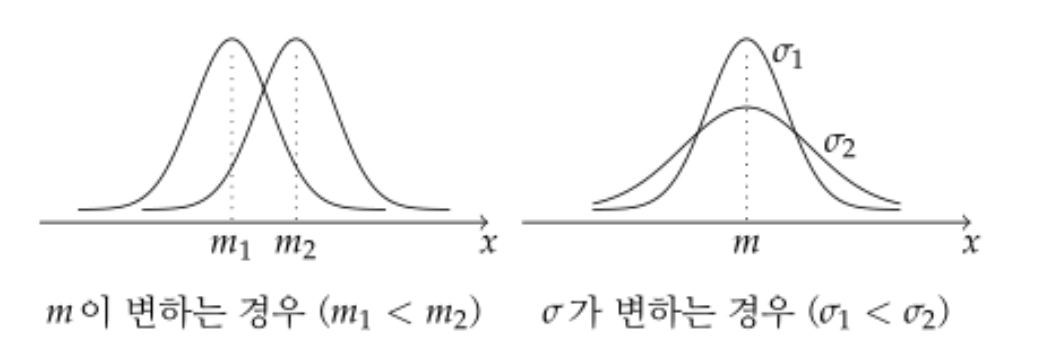

데이터 집단에 데이터의 단위에 관계없이 중심경향성은 같은 단위를 가져야 하므르 표준화를 해야 한다. 표준화는 평균 값이 0이 되고 분산이 1이 되도록 데이터를 변환하는 작업이다. 

$$
표준화후의\ 데이터 = \frac{(데이터-평균)}{표준편차}
$$

표준화한 데이터로 도수분포표를 그리면 아래 같이 종모양의 그래프가 나온다. 가로축에 $\sigma$는 표준편차를 표시하며, $1\sigma$는 표준편차 한 개를 의미한다. 평균에서 +-표준편차 1개는 68.3%가 포함된다는 의미.

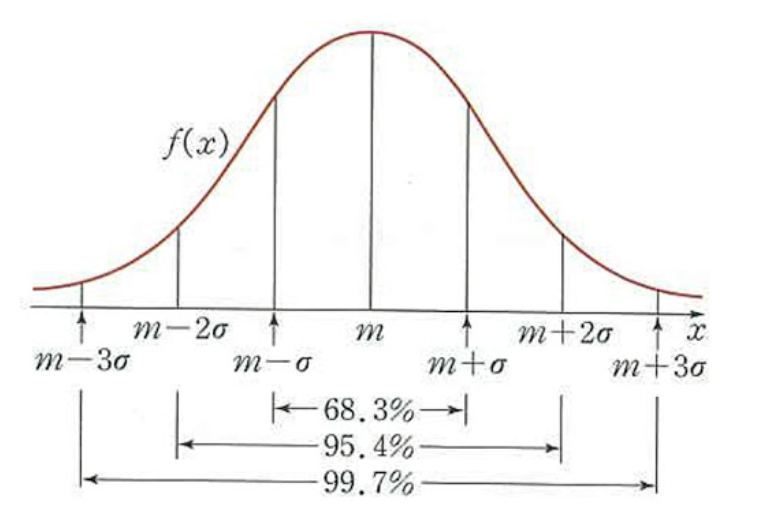



이렇게 표준화한 후 산의 중심에서 얼마나 멀리 있는지 보면 그것이 어떤 값인지 판단할 수 있다.

예의 시험점수는 평규니 0이되여 현실감이 없는데 표준화한 후 데이터는 0.18, -1.45 같은 값이 나오는데 이것이 점수라 하기 어렵다 그래서 고안한 것이 **표준점수**이다.

$$
표준점수 = \frac{점수 - 평균}{표준편차}\times 10 + 50
$$

이렇게 하면 시험 난이도에 상관 없이 평균을 받은 사람은 50이 된다. 표준화한 점수를 10배 해서 50을 더했으므로 도수분포표 모양도 정규분포 모양이다. 물론 중심에 멀리 떨어진 값이 나올 수 있다. 어쨌든 시험 점수의 표준점수가 산의 중심에서 얼마나 떨어져 있는지 보면 성적이 어느 정도인지 판단할 수 있다.


In [35]:
def calc_stdscore(v,m,stdev):
    """점수,평균,표준편차로 주어진 값의 표준점수를 계산한다
    calc_stdscore(variance, mean, stddev)
    """
    return (v-m)/stdev * 10 + 50

In [34]:
v1,e1,d1 = 320, 278, 60
v2,e2,d2 = 430,388,60

calc_stdscore(v1,e1,d1),calc_stdscore(v2,e2,d2)

(57.0, 57.0)

위 결과로 시험1과 시험2에서 수준이 변하지 않은 것을 알 수 있다.

---

# 7.3 관계조사하기

예를 들어 "사용자가 사이트에서 보낸 시간과 사용자의 친구 수 사이의 연관성"이 있다는 가설을 검증하려고 한다. 이런 두 데이터 세트 사이의 관계를 상관관계로 분석한다. 상관관계를 분석하는데

- 산포도
- 상관계수


## 7.3.1 산포도



데이터 속성 사이의 관계를 파악하는데 **산포도(산점도)**로 양.음의 관계를 파악한다.

2변량 (혹은 이상)의 데이터의 경향을 파악하는데 산점도(산포도) 그래프가 제격이다. 다음 같은 어느 학생들의 수학, 물리 점수이다.

| 번호 | 1 | 2 | 3 | 4 | 5 | 6 |
| ---- | --- | --- | --- | --- | --- | --- |
| 수학 | 50 | 60 | 40 | 30 | 70 | 50 |
| 물리 | 40 | 60 | 40 | 20 | 80 | 50 |


수학 점수를 가로축, 물리 점수를 세로축인 좌표로 생각해 보면, 1번 학생은 (50, 40) 좌표라 할 수 있다.

In [ ]:
score_math = [50, 60, 40, 30, 70, 50]
score_pysic = [40, 60, 40, 20, 80, 50]
plt.figure(figsize=(4,4))
plt.scatter(score_math, score_pysic,s=100, marker='.')
plt.axis('equal')

plt.show()

각 점들은 수학점수가 높을 수록 물리 점수도 높아지는 것을 파악할 수 있다. 또한 산포도 각 점은 우상향의 띄를 보여주는데 이것은 양의 기울기를 갖는 1차함수 그래프를 닮았다. 이럴때 통계에서는 두 속성 사이에 강한 양의 상관관계가 있다고 한다.

2변량 데이터의 산포도로 두 변량(속성) 사이의 **상관관계 유무의 강.약**을 알 수 있다. 

## 7.3.2 공분산과 상관관계

두 데이터의 관계성을 나타내는 것이 **공분산**과 **상관관계**이다.

두 데이터 x,y의 관계성은 x의 편차 X y의 편차를 했을 때 그 답이 양수가 되는 것은 모두가 평균 값보다 클 때와 작을 때를 나타낸다.  이런 관계를 산점도로 보면

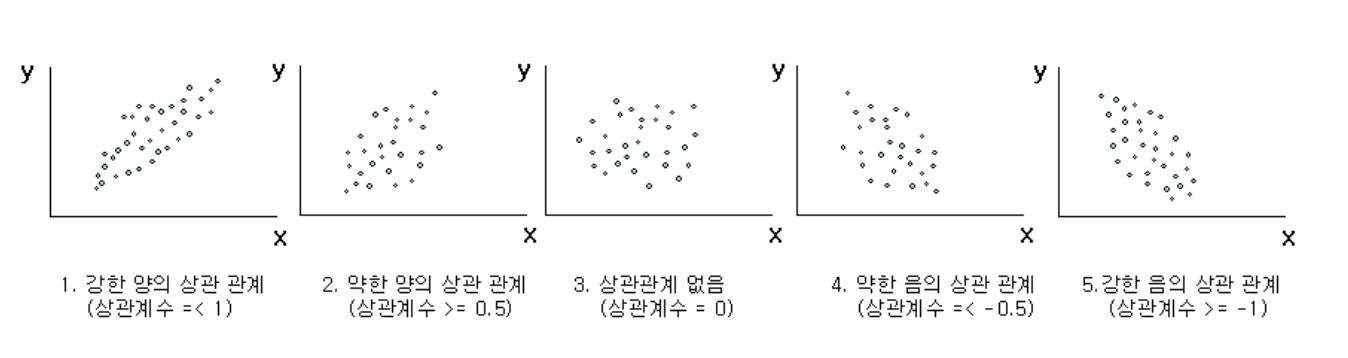
 - http://cfs11.blog.daum.net/image/21/blog/2008/03/30/08/15/47eecd81aaf6d&filename=산점도_그림.jpg
 
 

#### 상관관계 대해 주의할 점.

2가지 주의 점이 있다.

1. 강.약 상관관계 결과만으로 **일반적** 관계로 단정할 수 없다.
1. 두 속성 사이 상관관계가 파악되도 양자 사이의 인과관계는 단정할 수 없다.

즉, 상관관계가 인과관계가 아니라는 것이다 - 산포도로 관계는 파악되어도 **강.약 파악하기 어렵다**는 것이다.


### 공분산 Common Devariance

분산이 한 변수가 평균에서 얼마나 떨어져 있는지를 살펴보고, **공분산*은 *두 변수가 각각의 평균에서 얼마나 떨어져 있나* 를 살펴본다.

$$
공분산 = \frac{(x-x평균)\times(y-y평균)의\ 합계}{데이터의\ 개수}
$$

그래서 공분산이 *양수* 이면 x값이 클수록 y 값이 크고, x 값이 작을 수록 y 값도 작다. 반대로 *음수*이면 x값이 클수록 y값이 작고, x값이 작을 수록 y값이 크다는 의이미다. 공분산이 0이면 그와 같은 관계가 성립하지 않는다는 의미이다.

그러나 공분산은 두 데이터 관계의 지표는 되지만 단위가 정해지지 않는 단점이 있다. 시험 점수 같이 같은 단위의 비교는 괜잖지만, 스마트폰 사용 시간과 시험 점수를 비교하는 것은 어떻게 판단해야 할 지 알 수 없게 된다.

이런 경우 표준화 작업을 하게 된다. 공분산은 상관계수 식을 이용해 표준화 할 수 있다.

### 상관계수

$$
상관계수 = \frac{공분산}{(x표준편차)\times(y표준편차)}
$$


상관계수 Correlation 공식다음 같다. 같은 크기의 숫자 집합 x, y라고 하고 n은 숫자 집합 값의 개수이다.

$$
Correlation = \frac{n\sum xy - \sum x \sum y}{\sqrt{(n\sum x^2 - (\sum x)^2)(n\sum y^2 - (\sum y)^2)}}
$$
 
상관계수는 반드시 -1~1 범위이다.


상관계수는 *-1.0~1.0* 사이의 값을 갖으며, 0에 가까울 수 록 관계가 없음을 1에 가까울 수록 강한 양의 관계를 표현한다.


 - 상관계수가 0이면 두 집단간 선형 관계가 없다는 의미이다. 
     (그렇다고 서로 독립적이라는 의미는 아니다 - 둘 사이 비선형 관계가 있을 수 있다.), 
 - 1이거나 1에 가까우면 강한 양의 선형 관계가 있음을 의미하고, 
 - 1이면 완전한 양의 상관관계이다.
 - -1이거나 -1에 가까우면 강한 음의 관계가 있고
 - -1은 완전한 음의 상관관계이다.

#### NumPy에서 상관계수 계산

피어슨 상관관계 계산은 [numpy.corrcoef()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)에 두 변수 집합을 전달해 파악할 수 있다. 

```python
>>> import numpy as np
>>> np.corrcoef(LIST1, LIST2)[0,1]
0.02456
```

[NumPy.corrcoef()](http://t.thinkbee.kr/mybook/notebooks/Data_Science/Math_with_Python/SciPy-examples.ipynb#corrcoef()) 예제를 참조한다.

위 수학,물리 점수를 계산해 보면,

In [ ]:
# np.corrcoef()





##### ex) 학교 시험 성적과 수능 성적 데이터다.

In [ ]:
x = [90, 92, 95, 96, 87, 87, 90, 95, 98, 96] #고등학교 성적
y = [85, 87, 86, 97, 96, 88, 89, 98, 98, 87] # 수능 성적

In [ ]:
"""산포도"""
# plt.figure(figsize=(4,4))
plt.title('d')



plt.show()

In [ ]:
# numpy 평균, 분산, 표준편차




In [ ]:
# numpy 상관계수
print (f'시험성적 상관계수 {    }'

### 상관관계와 우연성

통계학에서 자주 *상관관계가 우연을 의미하지는 않는다* 라는 문구를 읽게 된다. 이 문구는 두 개의 관측 값 집합이 매우 강한 상관관계일지라고, 한개의 변수가 다른 변수의 원인이 됨을 의미하지는 않는다. 두 개의 변수가 강한 상관관계에 있을 때 때로는 두 변수에 영향을 주고 상관관계를 설명하는 3번째 인자가 있을 가능성이 높다.

고전적 사례를 들면 아이스크림 판매량과 범죄율 간의 상관 관계이다. 일반적인 도시에서 두 변수 간의 관계를 추적해 보면 여러분은 상관관계를 쉽게 찾아낼 수 있다. 하지만 이런 관계가 범죄율이 늘어나는 원인 혹은 영향을 준다고 할 수 없다. 아이스크림 판매량과 범죄율은 여름의 더워진 날씨에 따라 상승하기 때문에 상관관계는 높지만 이또한 뜨거운 날씨가 범죄율이 높이는 원인은 아니다. 상관관계 이면에는 더 복잡한 원인들이 숨어있기 마련이다.